<a href="https://colab.research.google.com/github/erena29/Data-Analysis-Python/blob/main/CO2%20Emission%20Impact%20on%20Global%20Temperature/CO2_Impact_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries and Read Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
sheet_url_trans ='https://docs.google.com/spreadsheets/d/1QwNi5gF4-IOPe9fw_2hBKOcT3EMwC78E5pLeZSY0HBY/edit#gid=878189928'
trans=sheet_url_trans.replace('/edit#gid=','/export?format=csv&gid=')
print(trans)

emission_transpor = pd.read_csv(trans)
emission_transpor.head()

https://docs.google.com/spreadsheets/d/1QwNi5gF4-IOPe9fw_2hBKOcT3EMwC78E5pLeZSY0HBY/export?format=csv&gid=878189928


,Year,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other
0,2000,2.535501,0.673750,1.701686,0.085601,0.621249,0.139543
1,2001,2.587838,0.656728,1.721471,0.082291,0.596998,0.143457
2,2002,2.665574,0.663804,1.755211,0.084140,0.613686,0.145448
3,2003,2.757510,0.660149,1.772868,0.086941,0.633882,0.150451
4,2004,2.844066,0.702585,1.858302,0.093784,0.681738,0.158168


In [ ]:
sheet_url_temp ='https://docs.google.com/spreadsheets/d/196IMwCDBO2WELhSGtP3tfHfg1dqrs8p46gJqW3RFtzM/edit#gid=881910076'
temp=sheet_url_temp.replace('/edit#gid=','/export?format=csv&gid=')
print(temp)

cont_temp = pd.read_csv(temp)
cont_temp.head()

https://docs.google.com/spreadsheets/d/196IMwCDBO2WELhSGtP3tfHfg1dqrs8p46gJqW3RFtzM/export?format=csv&gid=881910076


,Entity,Code,Year,N2O,CH4,CO2
0,Afghanistan,AFG,1851,1.030000e-07,0.000001,0.000002
1,Afghanistan,AFG,1852,2.080000e-07,0.000002,0.000003
2,Afghanistan,AFG,1853,3.150000e-07,0.000004,0.000005
3,Afghanistan,AFG,1854,4.230000e-07,0.000005,0.000006
4,Afghanistan,AFG,1855,5.340000e-07,0.000006,0.000008


## **Data Preparation**

### Filtering Data

In [ ]:
years_to_drop = [2020, 2025, 2030]
emission_transpor_flt = emission_transpor[~emission_transpor['Year'].isin(years_to_drop)]
emission_transpor_flt

,Year,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other
0,2000,2.535501,0.673750,1.701686,0.085601,0.621249,0.139543
1,2001,2.587838,0.656728,1.721471,0.082291,0.596998,0.143457
2,2002,2.665574,0.663804,1.755211,0.084140,0.613686,0.145448
3,2003,2.757510,0.660149,1.772868,0.086941,0.633882,0.150451
4,2004,2.844066,0.702585,1.858302,0.093784,0.681738,0.158168
5,2005,2.875399,0.729252,1.899518,0.099883,0.704680,0.164452
6,2006,2.918505,0.737423,1.945958,0.104573,0.751053,0.161973
7,2007,2.990950,0.756079,2.014080,0.104101,0.789985,0.171959
8,2008,3.007971,0.747583,2.033958,0.095429,0.777745,0.172905
9,2009,3.013497,0.708206,1.997611,0.082710,0.751354,0.148708


In [ ]:
filter1 = cont_temp['Entity'] == 'World'
filter2 = (cont_temp['Year'] >= 2000) & (cont_temp['Year'] <= 2018)

# Apply the combined filter to the DataFrame
cont_temp_flt= cont_temp[filter1&filter2]

# Drop the specified columns
cont_temp_flt=cont_temp_flt.drop(['Entity', 'Code'], axis=1)
cont_temp_flt

,Year,N2O,CH4,CO2
41189,2000,0.057675,0.320548,0.756641
41190,2001,0.058757,0.324235,0.770326
41191,2002,0.059853,0.327737,0.784484
41192,2003,0.060953,0.331678,0.799471
41193,2004,0.062089,0.335798,0.814771
41194,2005,0.063234,0.340016,0.830222
41195,2006,0.064394,0.344381,0.846274
41196,2007,0.065586,0.348737,0.862449
41197,2008,0.066766,0.353055,0.878978
41198,2009,0.067933,0.356933,0.895448


### Merge Two Dataframes

In [ ]:
# Merge dataframes based on the 'Year' column
df = pd.merge(emission_transpor_flt, cont_temp_flt, on='Year', how='inner')
df

,Year,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other,N2O,CH4,CO2
0,2000,2.535501,0.673750,1.701686,0.085601,0.621249,0.139543,0.057675,0.320548,0.756641
1,2001,2.587838,0.656728,1.721471,0.082291,0.596998,0.143457,0.058757,0.324235,0.770326
2,2002,2.665574,0.663804,1.755211,0.084140,0.613686,0.145448,0.059853,0.327737,0.784484
3,2003,2.757510,0.660149,1.772868,0.086941,0.633882,0.150451,0.060953,0.331678,0.799471
4,2004,2.844066,0.702585,1.858302,0.093784,0.681738,0.158168,0.062089,0.335798,0.814771
5,2005,2.875399,0.729252,1.899518,0.099883,0.704680,0.164452,0.063234,0.340016,0.830222
6,2006,2.918505,0.737423,1.945958,0.104573,0.751053,0.161973,0.064394,0.344381,0.846274
7,2007,2.990950,0.756079,2.014080,0.104101,0.789985,0.171959,0.065586,0.348737,0.862449
8,2008,3.007971,0.747583,2.033958,0.095429,0.777745,0.172905,0.066766,0.353055,0.878978
9,2009,3.013497,0.708206,1.997611,0.082710,0.751354,0.148708,0.067933,0.356933,0.895448


In [ ]:
df.columns

Index(['Year', 'Passenger road vehicles', 'Aviation', 'Road freight vehicles',
       'Rail', 'Shipping', 'Other', 'N2O', 'CH4', 'CO2'],
      dtype='object')

In [ ]:
# Checking duplicate values
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19 non-null     int64  
 1   Passenger road vehicles  19 non-null     float64
 2   Aviation                 19 non-null     float64
 3   Road freight vehicles    19 non-null     float64
 4   Rail                     19 non-null     float64
 5   Shipping                 19 non-null     float64
 6   Other                    19 non-null     float64
 7   N2O                      19 non-null     float64
 8   CH4                      19 non-null     float64
 9   CO2                      19 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.6 KB


In [ ]:
# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
df['Total Global Mean Surface Temperature'] = df['N2O'] + df['CH4'] + df['CO2']
df['Total Transport Emissions'] = df['Passenger road vehicles'] + df['Aviation'] + df['Road freight vehicles'] + df['Rail'] + df['Shipping']+ df['Other']
df

,Year,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other,N2O,CH4,CO2,Total Global Mean Surface Temperature,Total Transport Emissions
0,2000-01-01,2.535501,0.673750,1.701686,0.085601,0.621249,0.139543,0.057675,0.320548,0.756641,1.134864,5.757330
1,2001-01-01,2.587838,0.656728,1.721471,0.082291,0.596998,0.143457,0.058757,0.324235,0.770326,1.153318,5.788783
2,2002-01-01,2.665574,0.663804,1.755211,0.084140,0.613686,0.145448,0.059853,0.327737,0.784484,1.172074,5.927863
3,2003-01-01,2.757510,0.660149,1.772868,0.086941,0.633882,0.150451,0.060953,0.331678,0.799471,1.192102,6.061802
4,2004-01-01,2.844066,0.702585,1.858302,0.093784,0.681738,0.158168,0.062089,0.335798,0.814771,1.212658,6.338643
5,2005-01-01,2.875399,0.729252,1.899518,0.099883,0.704680,0.164452,0.063234,0.340016,0.830222,1.233472,6.473184
6,2006-01-01,2.918505,0.737423,1.945958,0.104573,0.751053,0.161973,0.064394,0.344381,0.846274,1.255048,6.619485
7,2007-01-01,2.990950,0.756079,2.014080,0.104101,0.789985,0.171959,0.065586,0.348737,0.862449,1.276772,6.827155
8,2008-01-01,3.007971,0.747583,2.033958,0.095429,0.777745,0.172905,0.066766,0.353055,0.878978,1.298800,6.835590
9,2009-01-01,3.013497,0.708206,1.997611,0.082710,0.751354,0.148708,0.067933,0.356933,0.895448,1.320314,6.702086


In [ ]:
# Filtering data for the year 2018
df_flt=df[df['Year']=='2018-01-01']
df_flt.head()

,Year,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other,N2O,CH4,CO2,Total Global Mean Surface Temperature,Total Transport Emissions
18,2018-01-01,3.622373,0.929525,2.365827,0.083519,0.855099,0.177986,0.079223,0.399151,1.057626,1.536001,8.034327


## ***Statistics Descriptive***

In [ ]:
df[['Total Global Mean Surface Temperature', 'Total Transport Emissions']].describe()

,Total Global Mean Surface Temperature,Total Transport Emissions
count,19.000000,19.000000
mean,1.326219,6.893858
std,0.126276,0.725790
min,1.134864,5.757330
25%,1.223065,6.405913
50%,1.320314,6.835590
75%,1.426380,7.419928
max,1.536001,8.034327


Didapatkan hasil bahwa rata-rata `Global Mean Surface Temperature` selama 2000-2018 adalah 1.326219°C, dengan simpangan baku 0.126276	°C, dengan suhu minimal 1.134864°C dan suhu maksimal 1.536001°C.

Sedangkan rata-rata `CO2 Transportation Emissions` selama 2000-2018 sebanyak 6.893858 Gt, dengan simpangan baku 0.725790 Gt, dengan jumlah minimal 5.757330 Gt dan jumlah maksimal 8.034327 Gt.

### Contribution to global mean surface temperature by gas

In [ ]:
df[['N2O','CH4','CO2']].describe()

,N2O,CH4,CO2
count,19.000000,19.000000,19.000000
mean,0.068128,0.357987,0.900104
std,0.006748,0.024627,0.094903
min,0.057675,0.320548,0.756641
25%,0.062662,0.337907,0.822497
50%,0.067933,0.356933,0.895448
75%,0.073476,0.377491,0.975413
max,0.079223,0.399151,1.057626


*   Rata-rata kontribusi `Gas N2O` terhadap suhu permukaan rata-rata global selama 2000-2018 adalah 0.068128°C, dengan simpangan baku 0.006748°C, dengan suhu minimal 0.057675°C dan suhu maksimal 0.079223°C.

*   Rata-rata kontribusi `Gas CH4` terhadap suhu permukaan rata-rata global selama 2000-2018 adalah 0.357987°C, dengan simpangan baku 0.024627°C, dengan suhu minimal 0.320548°C dan suhu maksimal 0.399151°C.

*    Rata-rata kontribusi `Gas CO2` terhadap suhu permukaan rata-rata global selama 2000-2018 adalah 0.900104°C, dengan simpangan baku 0.094903°C, dengan suhu minimal 0.756641°C dan suhu maksimal 1.057626°C.


In [ ]:
df[['Passenger road vehicles', 'Aviation', 'Road freight vehicles','Rail', 'Shipping', 'Other']].describe()

,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.080538,0.766862,2.046104,0.090787,0.749486,0.160081
std,0.336565,0.088074,0.219525,0.006714,0.083138,0.011612
min,2.535501,0.656728,1.701686,0.082291,0.596998,0.139543
25%,2.859733,0.705395,1.878910,0.085652,0.693209,0.151100
50%,3.013497,0.747583,2.033958,0.090099,0.775638,0.159617
75%,3.321634,0.809640,2.251120,0.094607,0.805356,0.168206
max,3.622373,0.929525,2.365827,0.104573,0.855099,0.180136


*   Rata-rata emisi CO2 yang dihasilkan `Passenger road vehicles` selama 2000-2018 sebanyak 3.080538 Gt, dengan simpangan baku 0.336565 Gt, dengan jumlah minimal 2.535501 Gt dan jumlah maksimal 3.622373 Gt

*   Rata-rata emisi CO2 yang dihasilkan `Aviation` selama 2000-2018 sebanyak 0.766862 Gt, dengan simpangan baku 0.088074 Gt, dengan jumlah minimal 0.656728 Gt dan jumlah maksimal 0.929525 Gt

*   Rata-rata emisi CO2 yang dihasilkan `Road freight vehicles` selama 2000-2018 sebanyak 2.046104 Gt, dengan simpangan baku 0.219525 Gt, dengan jumlah minimal 1.701686 Gt dan jumlah maksimal 2.365827 Gt

*   Rata-rata emisi CO2 yang dihasilkan `Rail` selama 2000-2018 sebanyak 0.090787 Gt, dengan simpangan baku 0.006714 Gt, dengan jumlah minimal 0.082291 Gt dan jumlah maksimal 0.104573 Gt

*   Rata-rata emisi CO2 yang dihasilkan `Shipping	` selama 2000-2018 sebanyak 0.749486 Gt, dengan simpangan baku 0.083138 Gt, dengan jumlah minimal 0.596998 Gt dan jumlah maksimal 0.855099 Gt

*   Rata-rata emisi CO2 yang dihasilkan `Other` selama 2000-2018 sebanyak 0.160081 Gt, dengan simpangan baku 0.011612 Gt, dengan jumlah minimal 0.139543 Gt dan jumlah maksimal 0.180136 Gt

## **Univariate Analysis**

In [ ]:
# Selecting and transposing the subset of columns
cont_temp=df_flt[['N2O','CH4','CO2']].transpose()

# Adding a title to the columns
cont_temp = cont_temp.rename(columns={18: 'Temperature'}).sort_values('Temperature',ascending=False)
cont_temp.head()

,Temperature
CO2,1.057626
CH4,0.399151
N2O,0.079223


In [ ]:
# Selecting and transposing the subset of columns
transport_ems=df_flt[['Passenger road vehicles', 'Aviation', 'Road freight vehicles','Rail', 'Shipping', 'Other']].transpose()

# Adding a title to the columns
transport_ems = transport_ems.rename(columns={18: 'Emission'}).sort_values('Emission',ascending=False)
transport_ems.head()

,Emission
Passenger road vehicles,3.622373
Road freight vehicles,2.365827
Aviation,0.929525
Shipping,0.855099
Other,0.177986


### ***Bar Chart*** ###

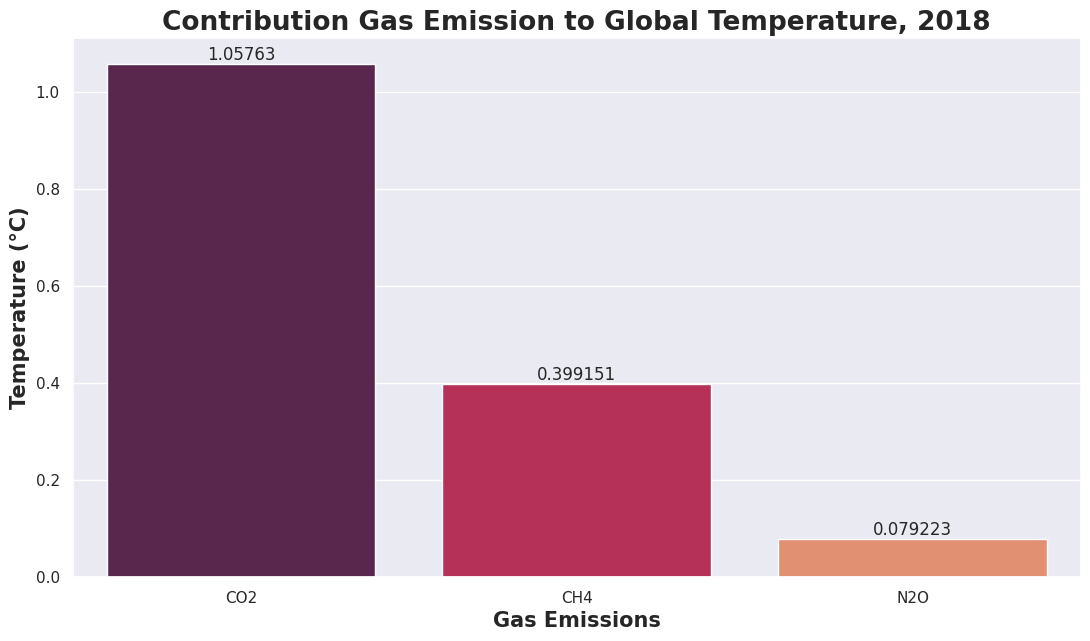

In [ ]:
sns.set_theme()

# Set figure size in inches
plt.figure(figsize=(13, 7))

# Plot Data
ax=sns.barplot(x=cont_temp.index,y='Temperature',data=cont_temp,palette='rocket',orient='v')

# Add Labels to the Bars
ax.bar_label(ax.containers[0])

# Set Title and Labels
plt.title('Contribution Gas Emission to Global Temperature, 2018', fontweight='bold',fontsize = 19)
plt.xlabel('Gas Emissions', fontweight='bold',fontsize = 15)
plt.ylabel('Temperature (°C)',fontweight='bold', fontsize = 15)


plt.show()

Hasil barplot menunjukkan bahwa `CO2` merupakan gas terbanyak yang menjadi kontribusi suhu permukaan rata-rata global tahun 2018, yaitu sebanyak 1.05763°C. Kemudian, pada urutan ke dua merupakan gas `CH4` dengan menyumbang sebanyak 0.399151°C dan urutan ketiga merupakan gas `N2O` dengan menyumbang sebanyak 0.079223°C

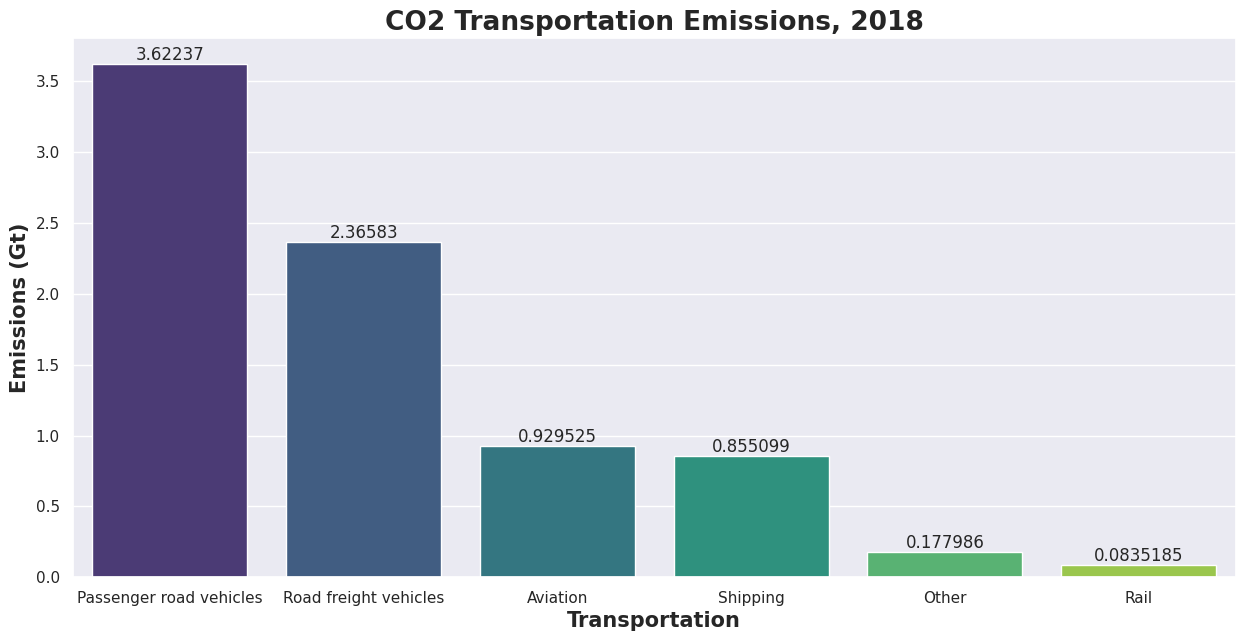

In [ ]:
sns.set_theme()

# Set figure size in inches
plt.figure(figsize=(15, 7))

# Plot Data
ax=sns.barplot(x=transport_ems.index,y='Emission',data=transport_ems,palette='viridis',orient='v')

# Add Labels to the Bars
ax.bar_label(ax.containers[0])

# Set Title and Labels
plt.title('CO2 Transportation Emissions, 2018', fontweight='bold',fontsize = 19)
plt.xlabel('Transportation', fontweight='bold',fontsize = 15)
plt.ylabel('Emissions (Gt)',fontweight='bold', fontsize = 15)


plt.show()

Hasil barplot menunjukkan bahwa `Passenger road vehicles` merupakan transportasi yang menyumbang emisi CO2 terbanyak pada tahun 2018, yaitu sebanyak 3.62237 Gt. Kemudian, pada urutan ke dua `Road freight vehicles` dengan menyumbang sebanyak 2.36583 Gt, kemudian `Aviation` dengan menyumbang sebanyak 0.929525 Gt, kemudian `Shipping` dengan menyumbang sebanyak 0.855099 Gt, kemudian `Other` dengan menyumbang sebanyak 0.177986 Gt dan  terakhir `Rail` dengan menyumbang sebanyak 0.0835185 Gt

### ***Pie Chart*** ###

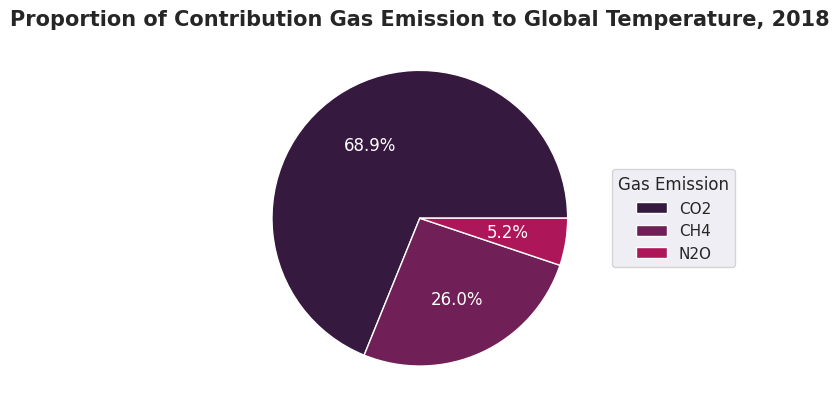

In [ ]:
# Get a color palette from Seaborn
color = sns.color_palette('rocket')

# Plot the Pie Chart
plt.pie(cont_temp['Temperature'], labels=cont_temp.index, autopct='%1.1f%%',colors=color,textprops={'color': 'white'})

# Add a legend
plt.legend(cont_temp.index, title='Gas Emission', loc='center left', bbox_to_anchor=(1, 0.5))

# Set Tittle
plt.title('Proportion of Contribution Gas Emission to Global Temperature, 2018',fontweight='bold',fontsize = 15)
plt.show()

Tahun 2018, gas `CO2` berkontribusi terhadap suhu permukaan rata-rata global sebanyak 68.9%, gas `CH4` berkontribusi sebanyak 26%, dan gas `N2O` berkontribusi sebanyak 5.2%

In [ ]:
import plotly.express as px

fig = px.pie(transport_ems, values=transport_ems['Emission'], names=transport_ems.index,
             color_discrete_sequence=px.colors.sequential.Aggrnyl,title='Proportion of CO2 Transportation Emissions, 2018')

# Increase the size of the labels
fig.update_traces(textfont_size=16)

# Center the title
fig.update_layout(title_x=0.5)

fig.show()

Tahun 2018, `Passenggger road vehicles` menyumbang emisi CO2 sebanyak 45.1%, `Road freight vehicles` menyumbang sebanyak 24.9%, `Aviation` menyumbang sebanyak 11.6%, `Shipping` menyumbang sebanyak 10.6%, `Other` menyumbang sebanyak 2.22% dan `Rail` sebanyyak 1.04%

### ***Histogram*** ###

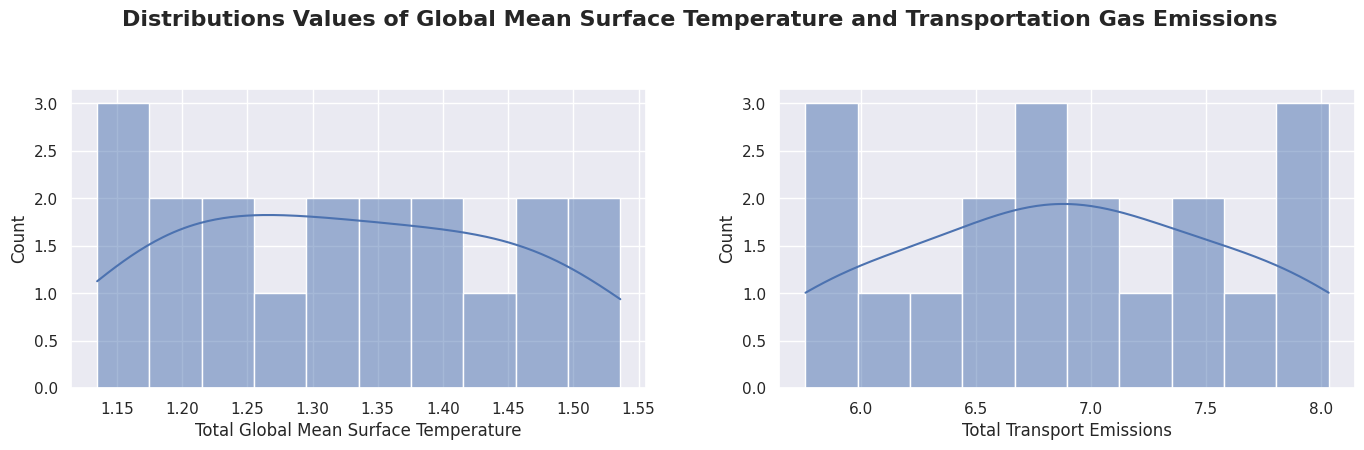

In [ ]:
sns.set_theme()

# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Distributions Values of Global Mean Surface Temperature and Transportation Gas Emissions',fontweight='bold',fontsize = 16)

# Plot Data
sns.histplot(ax=axes[0,], data=df, x='Total Global Mean Surface Temperature', kde=True,bins=10)
sns.histplot(ax=axes[1,], data=df, x='Total Transport Emissions', kde=True,bins=10)

# Show Plot
plt.show()

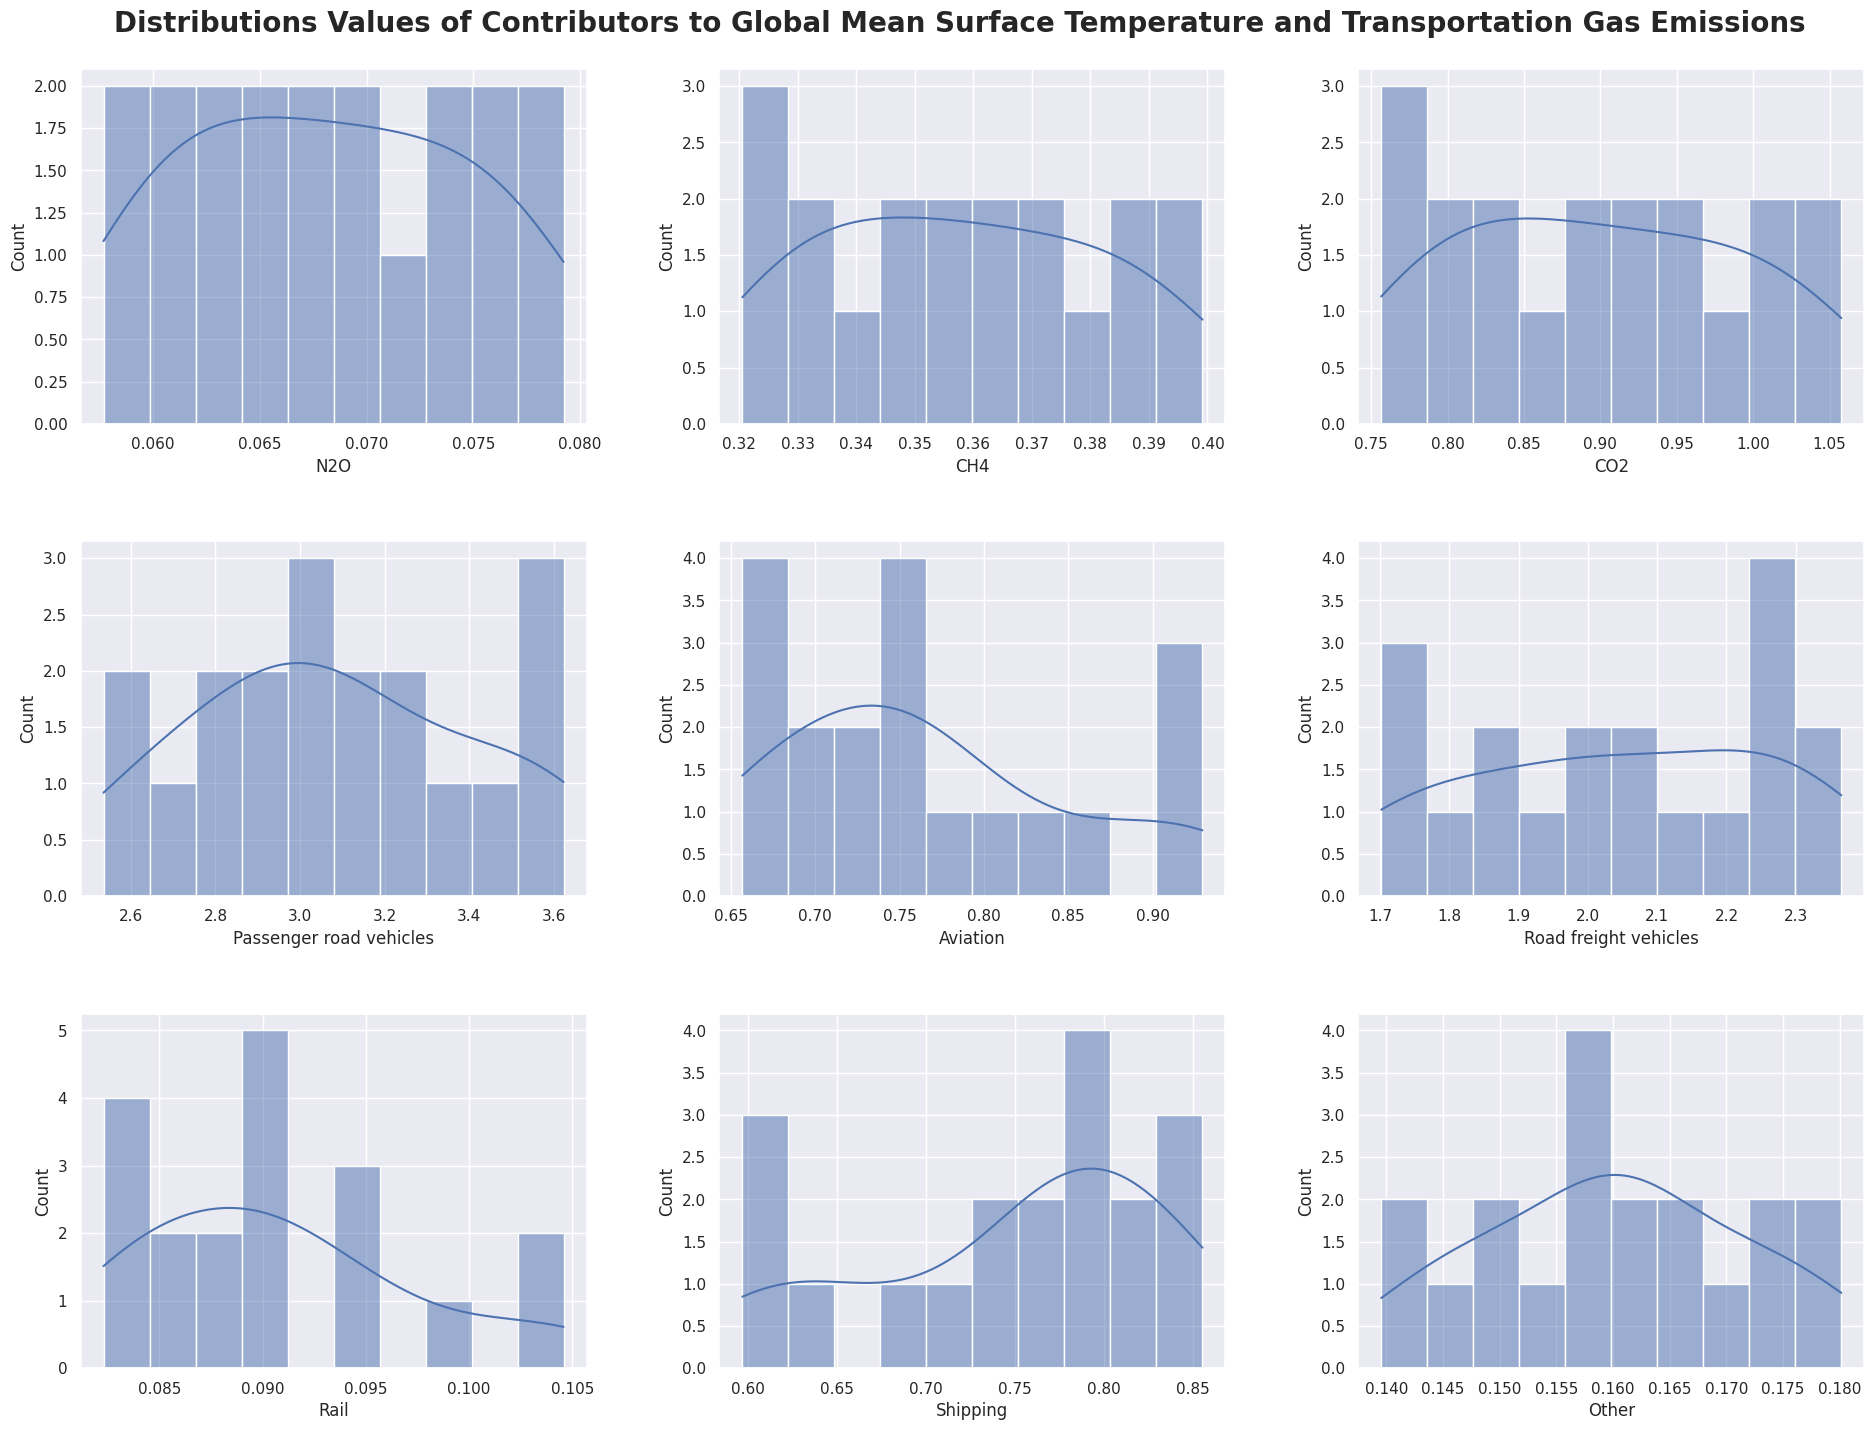

In [ ]:
# Create Subplots
fig, axes = plt.subplots(3, 3, figsize=(20,15))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Distributions Values of Contributors to Global Mean Surface Temperature and Transportation Gas Emissions',fontweight='bold',fontsize = 20)

# Plot Data
sns.histplot(ax=axes[0,0], data=df, x='N2O',bins=10, kde=True)
sns.histplot(ax=axes[0,1], data=df, x='CH4',bins=10, kde=True)
sns.histplot(ax=axes[0,2], data=df, x='CO2',bins=10, kde=True)

sns.histplot(ax=axes[1,0], data=df, x='Passenger road vehicles',bins=10, kde=True)
sns.histplot(ax=axes[1,1], data=df, x='Aviation',bins=10, kde=True)
sns.histplot(ax=axes[1,2], data=df, x='Road freight vehicles',bins=10, kde=True)
sns.histplot(ax=axes[2,0], data=df, x='Rail',bins=10, kde=True)
sns.histplot(ax=axes[2,1], data=df, x='Shipping',bins=10, kde=True)
sns.histplot(ax=axes[2,2], data=df, x='Other',bins=10, kde=True)

# Show Plot
plt.show()


### ***Box Plot*** ###

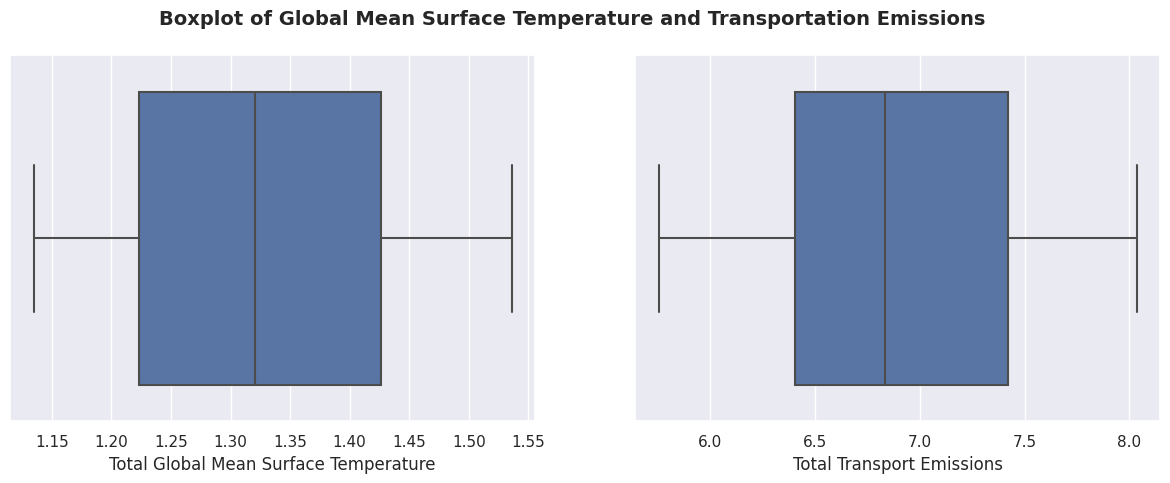

In [ ]:
# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(13,5))

# Adjust Layout
fig.tight_layout(pad=3)

# Set Title
fig.suptitle('Boxplot of Global Mean Surface Temperature and Transportation Emissions',fontweight='bold',fontsize = 14)

# Plot Data
sns.boxplot(ax=axes[0,], data=df, x='Total Global Mean Surface Temperature')
sns.boxplot(ax=axes[1,], data=df, x='Total Transport Emissions')

# Show Plot
plt.show()

Pada boxplot `Total Global Mean Surface Temperature` dan `Total Transport Emissions` tidak terdapat outlier. Boxplot tanpa outlier menunjukkan bahwa sebagian besar data berada dalam kisaran yang relatif seragam dan tidak ada nilai-nilai ekstrem yang signifikan.


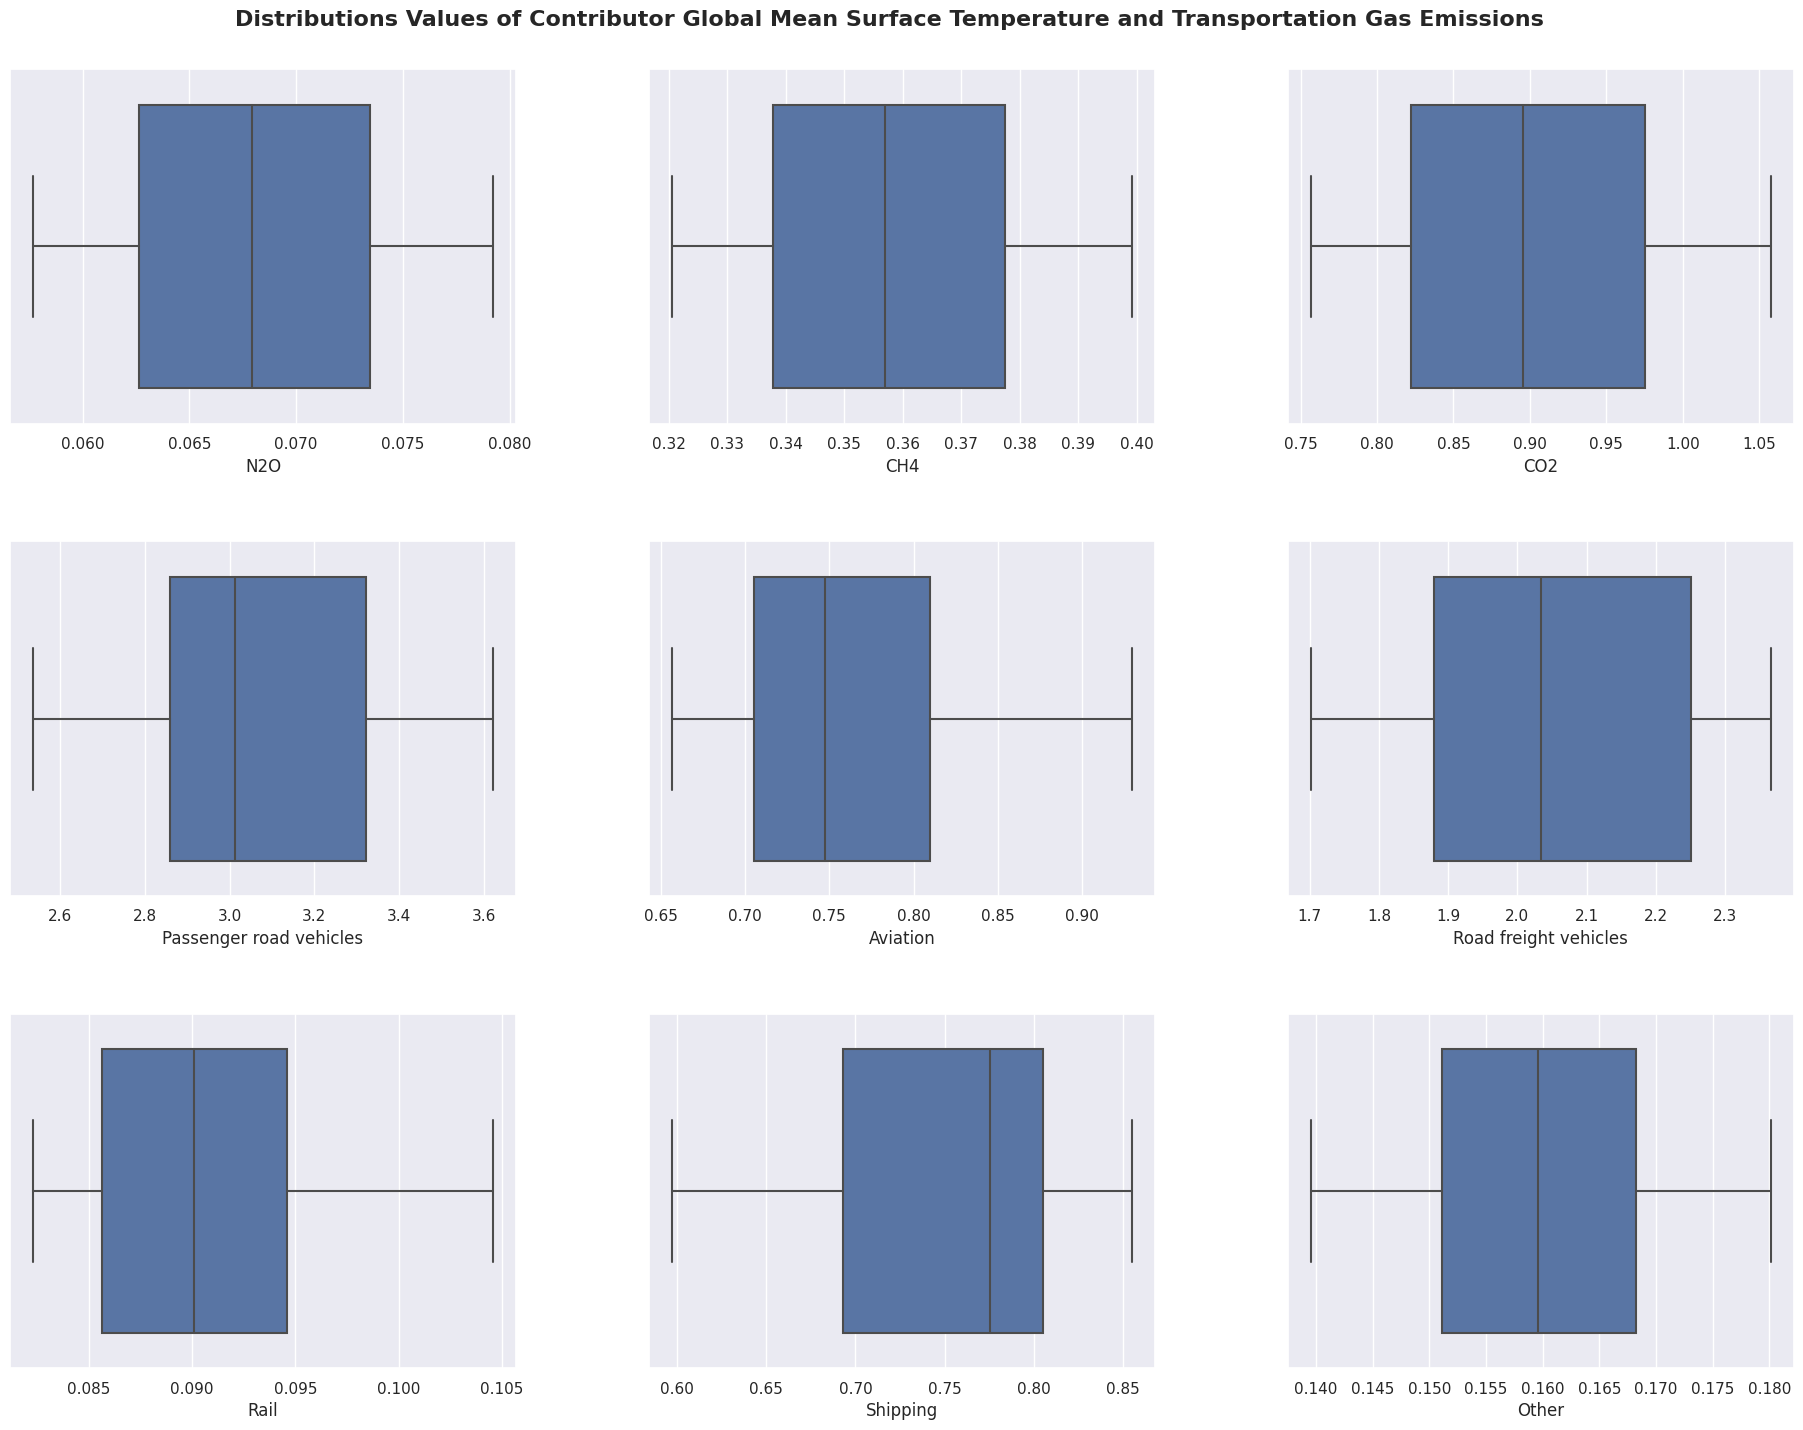

In [ ]:
# Create Subplots
fig, axes = plt.subplots(3, 3, figsize=(20,15))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Distributions Values of Contributor Global Mean Surface Temperature and Transportation Gas Emissions',fontweight='bold',fontsize = 16)

# Plot Data
sns.boxplot(ax=axes[0,0], data=df, x='N2O')
sns.boxplot(ax=axes[0,1], data=df, x='CH4')
sns.boxplot(ax=axes[0,2], data=df, x='CO2')

sns.boxplot(ax=axes[1,0], data=df, x='Passenger road vehicles')
sns.boxplot(ax=axes[1,1], data=df, x='Aviation')
sns.boxplot(ax=axes[1,2], data=df, x='Road freight vehicles')
sns.boxplot(ax=axes[2,0], data=df, x='Rail')
sns.boxplot(ax=axes[2,1], data=df, x='Shipping')
sns.boxplot(ax=axes[2,2], data=df, x='Other')

# Show Plot
plt.show()

Berdasarkan boxplot diatas, dapat disimpulkan bahwa hampir seluruh variabel tidak memiliki outlier. Hanya diagram boxplot `Railways` yang ada titik outlier. Boxplot dengan outlier mengindikasikan keberadaan nilai-nilai yang signifikan yang berbeda dari sebagian besar data.

 ## **Bivariate Analysis** ##

### ***Line Plot*** ###

Text(0, 0.5, 'Temperature (°C)')

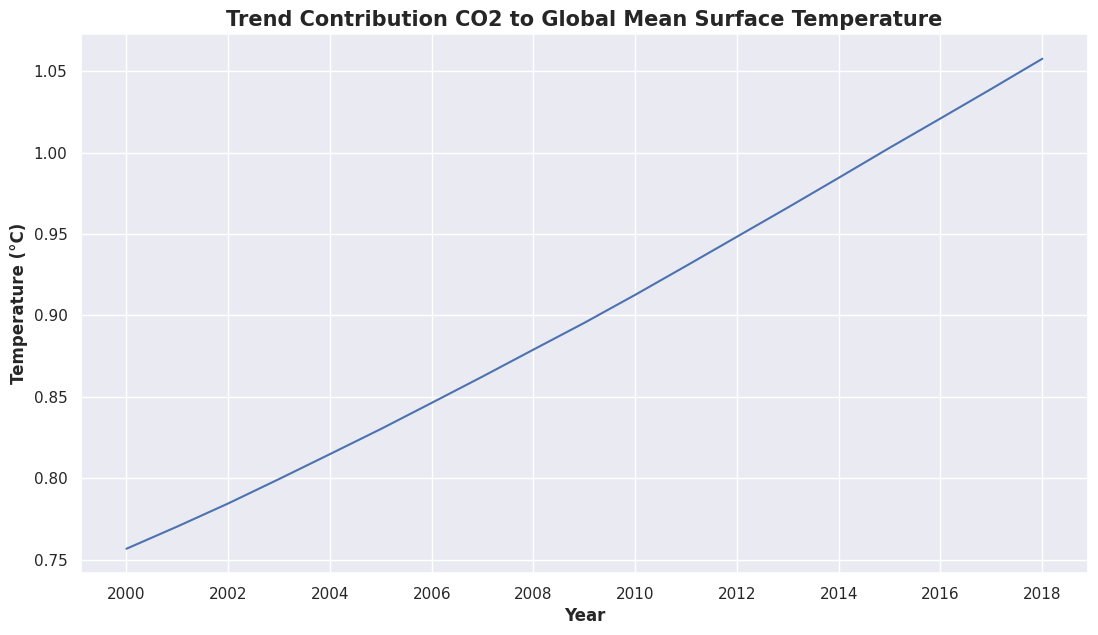

In [ ]:
# Create Subplots
plt.subplots(figsize=(13,7))

# Plot
sns.lineplot(data=df, x='Year', y='CO2')

plt.title('Trend Contribution CO2 to Global Mean Surface Temperature', fontsize = 15,fontweight='bold')
plt.xlabel('Year',fontsize = 12,fontweight='bold')
plt.ylabel('Temperature (°C)',fontsize = 12,fontweight='bold')

Hasil line plot menunjukkan bahwa kontribusi CO2 terhadap suhu permukaan rata-rata global mengalami kenaikan dari tahun ke tahun

Text(0, 0.5, 'Emissions (Gt)')

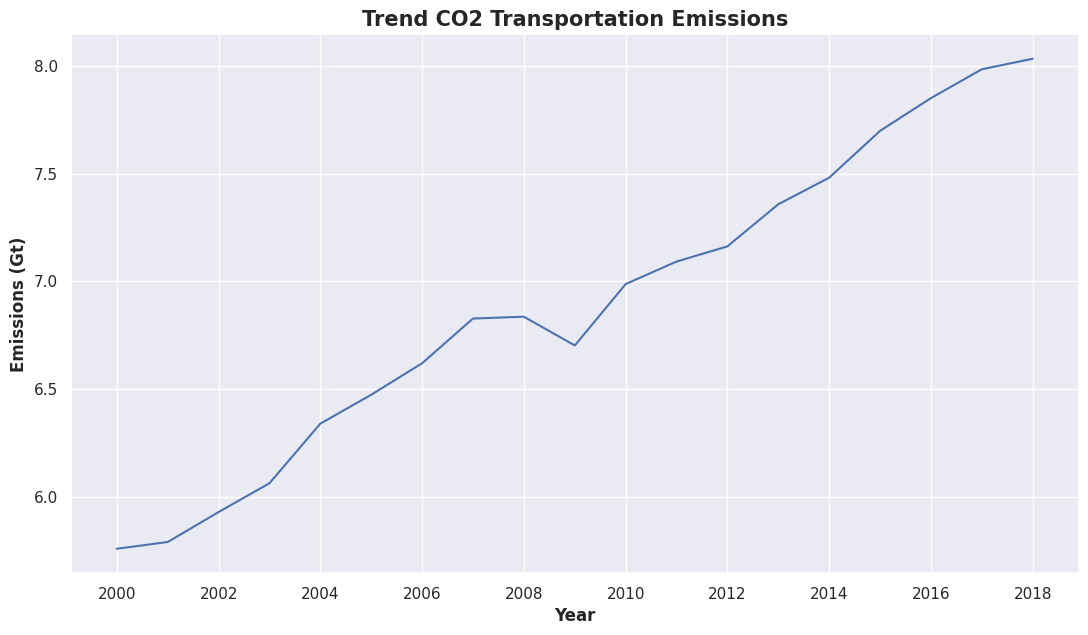

In [ ]:
# Create Subplots
plt.subplots(figsize=(13,7))

# Plot
sns.lineplot(data=df, x='Year', y='Total Transport Emissions')

# Set Title and Labels
plt.title('Trend CO2 Transportation Emissions', fontsize = 15,fontweight='bold')
plt.xlabel('Year',fontsize = 12,fontweight='bold')
plt.ylabel('Emissions (Gt)',fontsize = 12,fontweight='bold')

Text(0, 0.5, 'Emissions (Gt)')

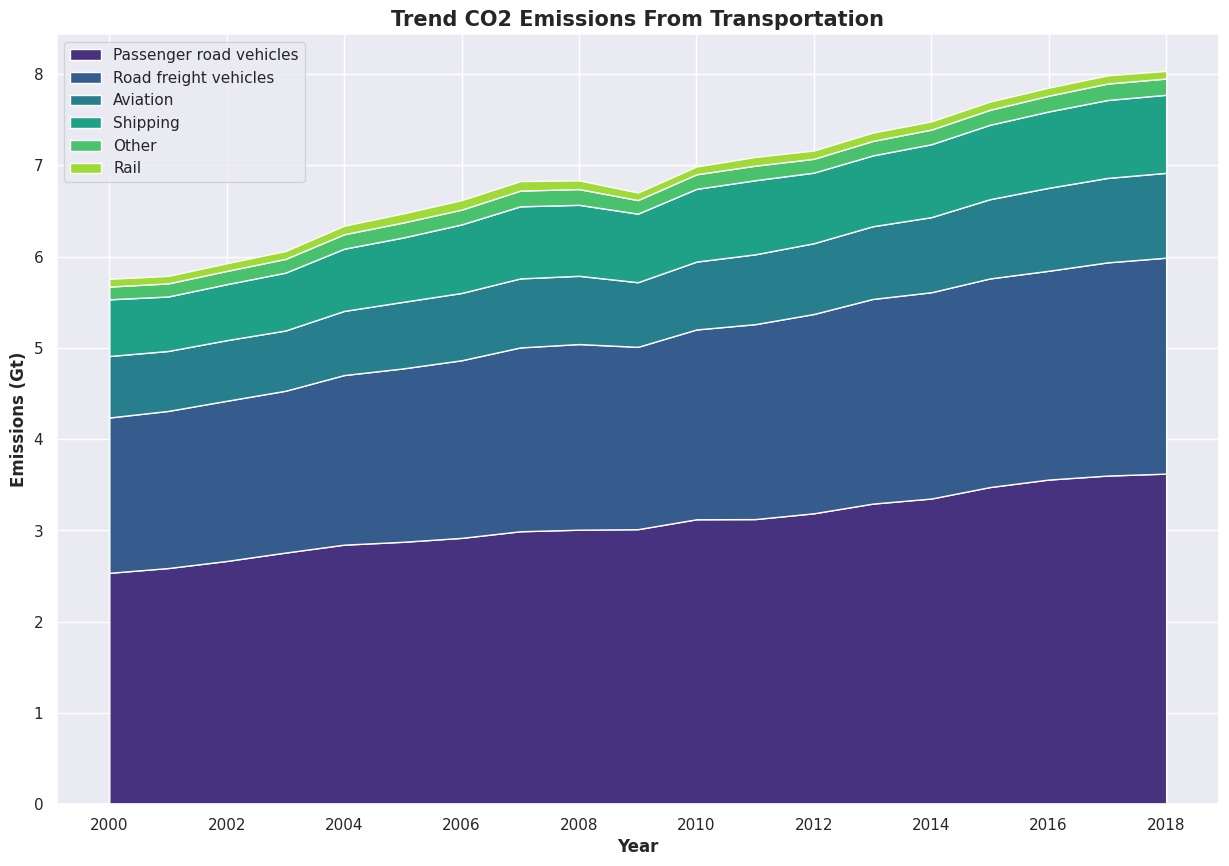

In [ ]:
# Create Subplots
plt.subplots(figsize=(15,10))

#define colors to use in chart
color_map = sns.color_palette("viridis")

#create area chart
plt.stackplot(df['Year'], df['Passenger road vehicles'], df['Road freight vehicles'],df['Aviation'],df['Shipping'],df['Other'],df['Rail'],
              labels=['Passenger road vehicles','Road freight vehicles', 'Aviation', 'Shipping' , 'Other','Rail'],
              colors=color_map)

#add legend
plt.legend(loc='upper left')

# Set Title and Labels
plt.title('Trend CO2 Emissions From Transportation', fontsize = 15,fontweight='bold')
plt.xlabel('Year',fontsize = 12,fontweight='bold')
plt.ylabel('Emissions (Gt)',fontsize = 12,fontweight='bold')


Hasil line plot menunjukkan emisi CO2 yang dihasilkan transportasi memiliki tren cenderung naik dari tahun ke tahun walaupun beberapa tahun sempat menngalami penurunan


### ***Scatter Plot*** ###

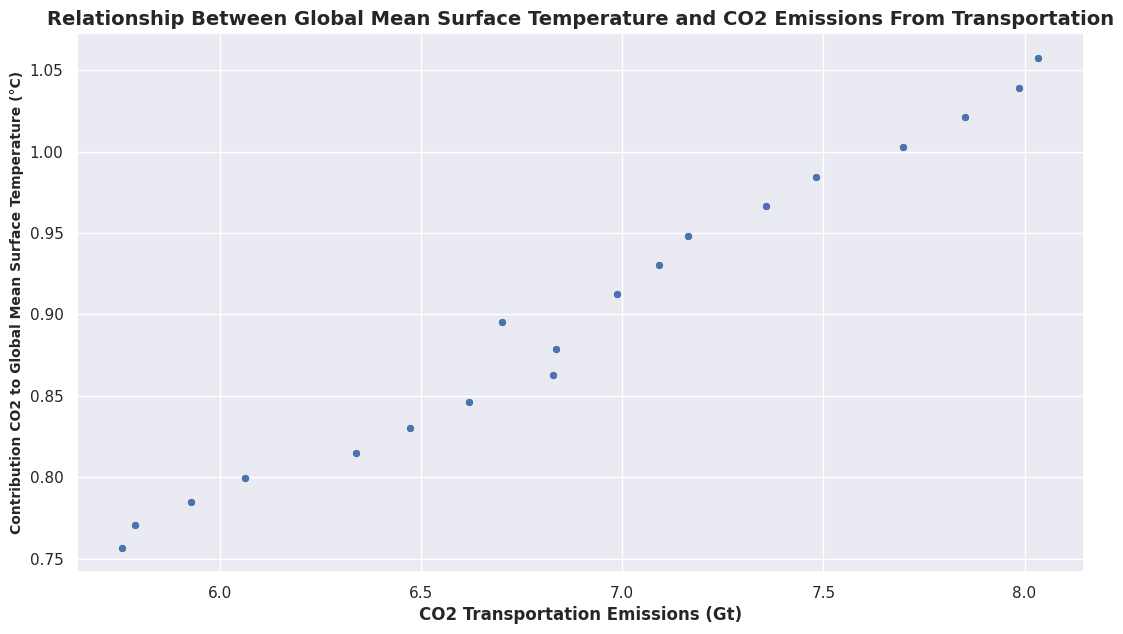

In [ ]:
# Create Subplots
plt.subplots(figsize=(13,7))

# Plot Data
sns.scatterplot(data=df,x='Total Transport Emissions', y='CO2')

# Set Title and Labels
plt.title('Relationship Between Global Mean Surface Temperature and CO2 Emissions From Transportation', fontweight='bold',fontsize = 14)
plt.xlabel('CO2 Transportation Emissions (Gt)', fontweight='bold',fontsize = 12)
plt.ylabel('Contribution CO2 to Global Mean Surface Temperature (°C)',fontweight='bold', fontsize = 10)

# Show Plot
plt.show()

Berdasarkan scatterplot `Contribution CO2 to Global Mean Surface Temperature` dan `CO2 Emissions From Transportation` menunjukkan bahwa data cenderung membentuk pola menaik walaupun cenderung menyebar. Artinya, semakin banyak gas emisi CO2 yang dihasilkan transportasi, semakin tinggi suhu permukaan rata-rata global

### ***Heatmap*** ###

In [ ]:
# Dropping columns
columns_to_drop = ['N2O', 'CH4','Total Global Mean Surface Temperature']
dff=df.drop(columns=columns_to_drop)


In [ ]:
corr = dff.corr()
corr

<ipython-input-31-9d3e7015cb8f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other,CO2,Total Transport Emissions
Passenger road vehicles,1.000000,0.966178,0.982963,-0.013132,0.919792,0.753807,0.992931,0.995577
Aviation,0.966178,1.000000,0.934508,0.020260,0.874557,0.794787,0.950616,0.965125
Road freight vehicles,0.982963,0.934508,1.000000,0.041429,0.941146,0.718587,0.989967,0.991374
Rail,-0.013132,0.020260,0.041429,1.000000,0.230464,0.409574,-0.064104,0.051101
Shipping,0.919792,0.874557,0.941146,0.230464,1.000000,0.809507,0.917165,0.946949
Other,0.753807,0.794787,0.718587,0.409574,0.809507,1.000000,0.699669,0.775866
CO2,0.992931,0.950616,0.989967,-0.064104,0.917165,0.699669,1.000000,0.990891
Total Transport Emissions,0.995577,0.965125,0.991374,0.051101,0.946949,0.775866,0.990891,1.000000


<ipython-input-32-e13c6cd45f10>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



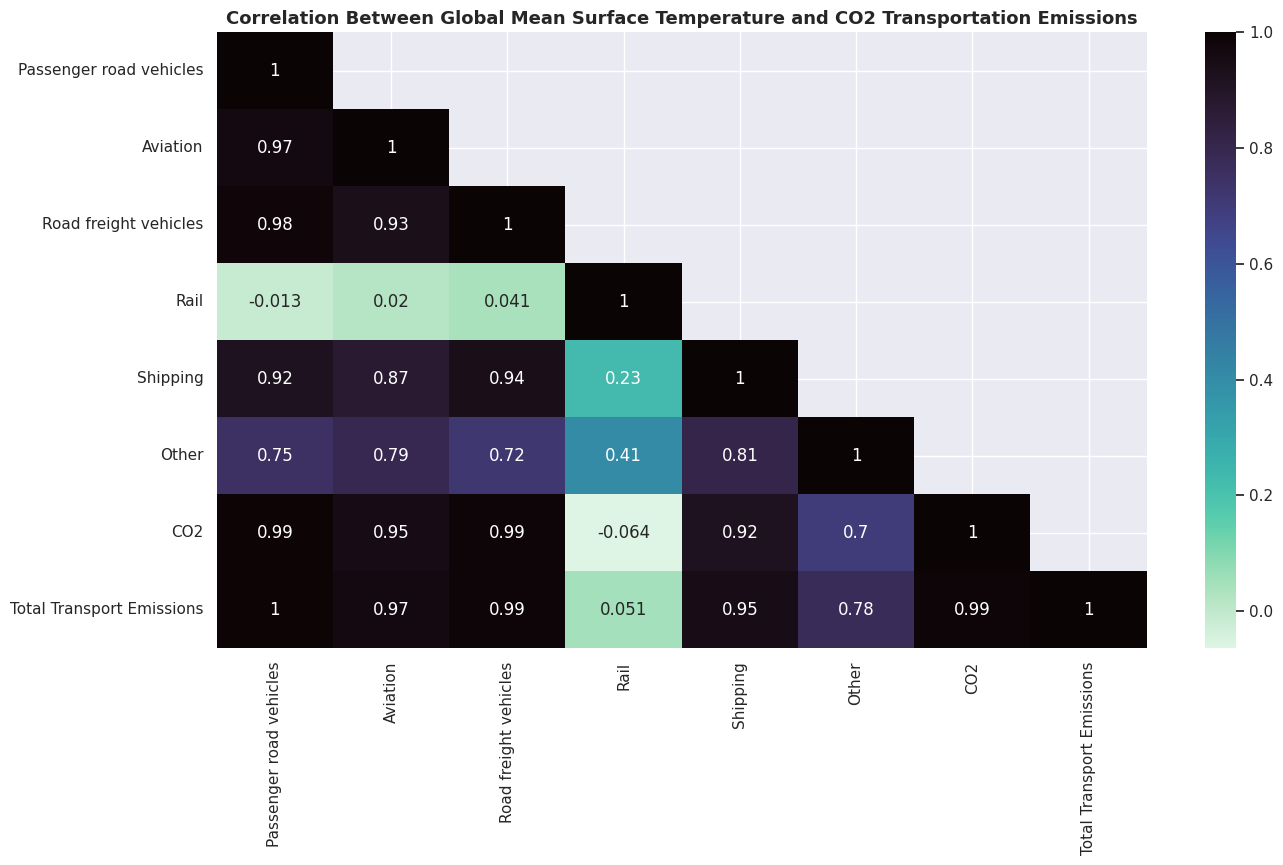

In [ ]:
# Create Subplots
fig, ax = plt.subplots(figsize = (15, 8))

# Create Mask
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plot Data
sns.heatmap(dff.corr(),  cmap="mako_r",annot=True, mask=mask)

# Set Title
plt.title('Correlation Between Global Mean Surface Temperature and CO2 Transportation Emissions', fontweight='bold',fontsize = 13)
plt.show()

Sebagian besar terdapat korelasi yang tinggi antara `Contribution CO2 to Global Mean Surface Temperature` dengan `CO2 Emissions From Transportation`, kecuali dengan transportation `Rail` memiliki korelasi yang rendah yaitu -0.064

## **Supervised Learning**

### ***Regression - Simple Linear Regression***

Text(0, 0.5, 'Global Mean Surface Temperature (°C)')

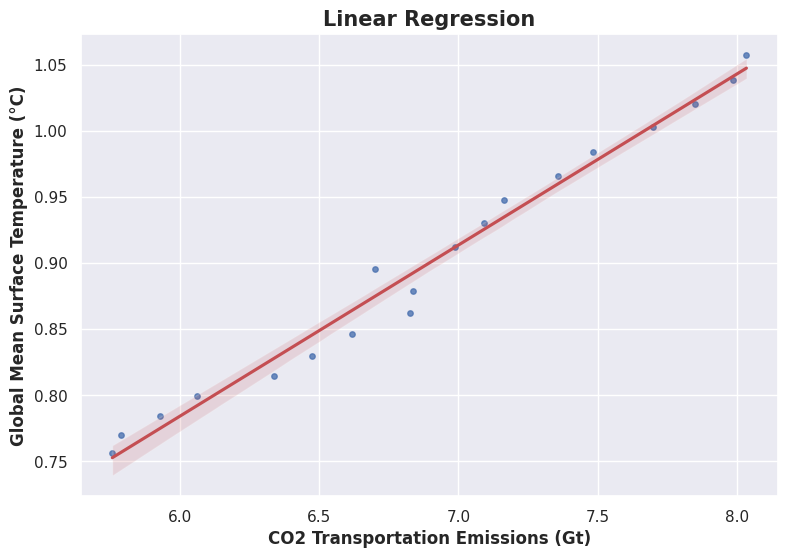

In [ ]:
# Create Subplots
plt.subplots(figsize=(9,6))

# Plot Linier Regression
sns.regplot(data=df, x='Total Transport Emissions', y='CO2',scatter_kws= {'s':15},line_kws=dict(color="r"))

# Set Title and Labels
plt.title('Linear Regression', fontsize = 15,fontweight='bold')
plt.xlabel('CO2 Transportation Emissions (Gt)', fontweight='bold',fontsize = 12)
plt.ylabel('Global Mean Surface Temperature (°C)',fontweight='bold', fontsize = 12)

In [ ]:
import statsmodels.api as sm

# Adding a constant to get an intercept
occurence_sm = sm.add_constant(df['Total Transport Emissions'])

# Fitting the resgression line using 'OLS'
lr = sm.OLS(df['CO2'], occurence_sm).fit()
lr.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     920.4
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           3.03e-16
Time:                        10:40:16   Log-Likelihood:                 56.391
No. Observations:                  19   AIC:                            -108.8
Df Residuals:                      17   BIC:                            -106.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0069      0.030      0.233      0.819      -0.056       0.069
Total Transport Emissions     0.1296      0.004     30.337      0.000       0.121       0.139
==============================================================================
Omnibus:                        1.807   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.351
Skew:                          -0.628   Prob(JB):                        0.509
Kurtosis:                       2.638   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Nilai `R-squared` = 0.982, yang berarti 98.2% `Contribution CO2 to Global Mean Surface Temperature` dapat dijelaskan oleh `CO2 Transport Emissions` menggunakan garis ini.
2. Nilai `P-Value`= 0.00 > `Sig`= 0.05, yang berarti kesesuaian model  signifikan secara statistik. Sehingga dapat disimpulkan bahwa variabel `CO2 Transport Emissions`  memiliki dampak yang signifikan terhadap variabel `Contribution CO2 to Global Mean Surface Temperature`
3. Dari parameter, kita mendapatkan nilai intercept dan slope untuk garis lurus. Persamaan garisnya adalah,
`Contribution CO2 to Global Mean Surface Temperature` = 0.0069 +	0.1296 * `CO2 Transport Emissions`

### ***Forcasting***

In [ ]:
# Set 'Year' as the index
dff = df.set_index('Year')
dff.head()

,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other,N2O,CH4,CO2,Total Global Mean Surface Temperature,Total Transport Emissions
Year,,,,,,,,,,,
2000-01-01,2.535501,0.673750,1.701686,0.085601,0.621249,0.139543,0.057675,0.320548,0.756641,1.134864,5.757330
2001-01-01,2.587838,0.656728,1.721471,0.082291,0.596998,0.143457,0.058757,0.324235,0.770326,1.153318,5.788783
2002-01-01,2.665574,0.663804,1.755211,0.084140,0.613686,0.145448,0.059853,0.327737,0.784484,1.172074,5.927863
2003-01-01,2.757510,0.660149,1.772868,0.086941,0.633882,0.150451,0.060953,0.331678,0.799471,1.192102,6.061802
2004-01-01,2.844066,0.702585,1.858302,0.093784,0.681738,0.158168,0.062089,0.335798,0.814771,1.212658,6.338643


In [ ]:
# Split the data into training and testing sets
train_size = int(len(dff) * 0.75)
train, test = dff[:train_size], dff[train_size:]

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


### Contribution CO2 to Temperature

In [ ]:
from pmdarima.arima import auto_arima
# Use auto_arima to find the best ARIMA model
model1 = auto_arima(train['CO2'], trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-147.250, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-149.010, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-151.742, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-149.159, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-150.370, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-152.936, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-150.993, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-148.539, Time=0.19 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-145.060, Time=0.37 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-155.189, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-157.528, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-159.202, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-157.432, Time=0.13 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 1.475 seconds


In [ ]:
# Fit the best ARIMA model to the training data
model1.fit(train['CO2'])

ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
# Forecast future values based on the trained ARIMA model
forecast1 = model1.predict(n_periods=10)
forecast1= pd.Series(forecast1)
forecast1

2014-01-01    0.984636
2015-01-01    1.003329
2016-01-01    1.022380
2017-01-01    1.041789
2018-01-01    1.061556
2019-01-01    1.081680
2020-01-01    1.102163
2021-01-01    1.123003
2022-01-01    1.144200
2023-01-01    1.165756
Freq: AS-JAN, dtype: float64

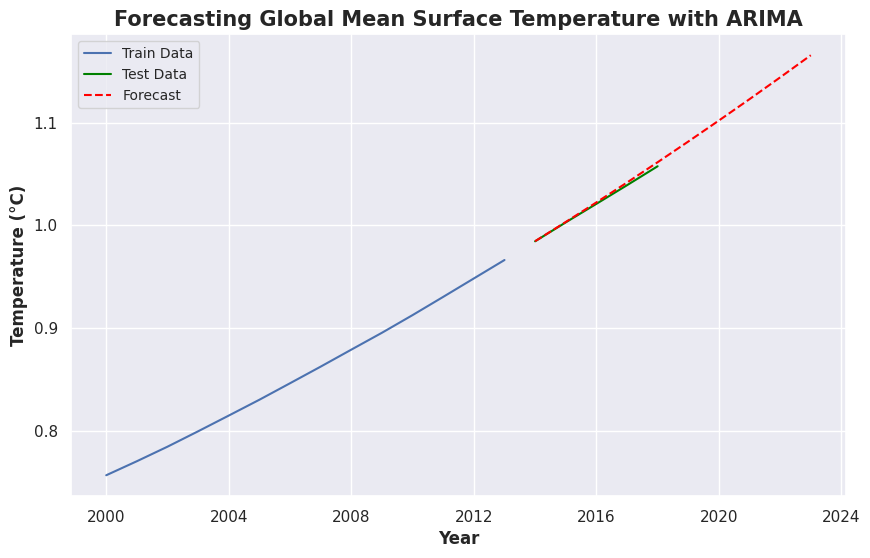

In [ ]:
# Create Subplots
plt.subplots(figsize = (10, 6))

# Plot train data
plt.plot(train['CO2'], label='Train Data')

# Plot test data
plt.plot(test['CO2'], color = "green",label='Test Data')

# Plot forecast with step line
plt.plot(forecast1, color = "red", label='Forecast', linestyle='--')

# Set Title and Labels
plt.title('Forecasting Global Mean Surface Temperature with ARIMA',fontweight='bold',fontsize = 15)
plt.ylabel('Temperature (°C)',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.legend(loc = 2, prop = {'size': 10})
plt.show()

### Emission CO2 by Transport

In [ ]:
# Use auto_arima to find the best ARIMA model
model2 = auto_arima(train['Passenger road vehicles'], trace=True, error_action='ignore', suppress_warnings=True)
model3 = auto_arima(train['Aviation'], trace=True, error_action='ignore', suppress_warnings=True)
model4 = auto_arima(train['Road freight vehicles'], trace=True, error_action='ignore', suppress_warnings=True)
model5 = auto_arima(train['Rail'], trace=True, error_action='ignore', suppress_warnings=True)
model6 = auto_arima(train['Shipping'], trace=True, error_action='ignore', suppress_warnings=True)
model7 = auto_arima(train['Other'], trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-46.215, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-44.729, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-44.941, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-30.979, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-44.078, Time=0.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.950 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-52.202, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-58.938, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56.938, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56.938, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-58.642, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-54.938, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time

In [ ]:
forecast2 = model2.predict(n_periods=10)
forecast3 = model3.predict(n_periods=10)
forecast4 = model4.predict(n_periods=10)
forecast5 = model5.predict(n_periods=10)
forecast6 = model6.predict(n_periods=10)
forecast7 = model7.predict(n_periods=10)

forecast_trans = pd.DataFrame({
    'Passenger road vehicles': forecast2,
    'Aviation': forecast3,
    'Road freight vehicles': forecast4,
    'Rail': forecast5,
    'Shipping': forecast6,
    'Other': forecast7
})
forecast_trans.head(10)

,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other
2014-01-01,3.352053,0.806062,2.263585,0.096237,0.787514,0.156810
2015-01-01,3.410378,0.815513,2.305000,0.095224,0.799391,0.155678
2016-01-01,3.468703,0.824964,2.346416,0.092043,0.811267,0.155678
2017-01-01,3.527027,0.834415,2.387831,0.092043,0.823143,0.155678
2018-01-01,3.585352,0.843866,2.429247,0.092043,0.835019,0.155678
2019-01-01,3.643677,0.853317,2.470662,0.092043,0.846895,0.155678
2020-01-01,3.702001,0.862768,2.512077,0.092043,0.858771,0.155678
2021-01-01,3.760326,0.872219,2.553493,0.092043,0.870647,0.155678
2022-01-01,3.818651,0.881670,2.594908,0.092043,0.882523,0.155678
2023-01-01,3.876975,0.891121,2.636324,0.092043,0.894399,0.155678


In [ ]:
forecast_trans['Total Transport Emissions'] = forecast_trans['Passenger road vehicles'] + forecast_trans['Aviation'] + forecast_trans['Road freight vehicles'] + forecast_trans['Rail'] + forecast_trans['Shipping']+ forecast_trans['Other']
forecast_trans.head(10)

,Passenger road vehicles,Aviation,Road freight vehicles,Rail,Shipping,Other,Total Transport Emissions
2014-01-01,3.352053,0.806062,2.263585,0.096237,0.787514,0.156810,7.462262
2015-01-01,3.410378,0.815513,2.305000,0.095224,0.799391,0.155678,7.581184
2016-01-01,3.468703,0.824964,2.346416,0.092043,0.811267,0.155678,7.699070
2017-01-01,3.527027,0.834415,2.387831,0.092043,0.823143,0.155678,7.820137
2018-01-01,3.585352,0.843866,2.429247,0.092043,0.835019,0.155678,7.941205
2019-01-01,3.643677,0.853317,2.470662,0.092043,0.846895,0.155678,8.062272
2020-01-01,3.702001,0.862768,2.512077,0.092043,0.858771,0.155678,8.183339
2021-01-01,3.760326,0.872219,2.553493,0.092043,0.870647,0.155678,8.304406
2022-01-01,3.818651,0.881670,2.594908,0.092043,0.882523,0.155678,8.425473
2023-01-01,3.876975,0.891121,2.636324,0.092043,0.894399,0.155678,8.546540


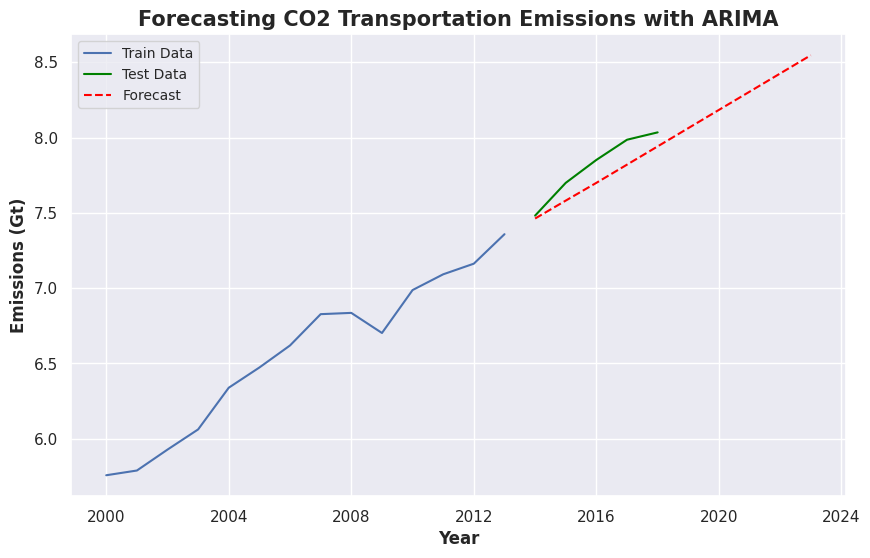

In [ ]:
# Create Subplots
plt.subplots(figsize = (10, 6))

# Plot original data
plt.plot(train['Total Transport Emissions'], label='Train Data')

# Plot original data
plt.plot(test['Total Transport Emissions'], color = "green",label='Test Data')

# Plot forecast with step line
plt.plot(forecast_trans['Total Transport Emissions'], color = "red", label='Forecast', linestyle='--')

# Set Title and Labels
plt.title('Forecasting CO2 Transportation Emissions with ARIMA',fontweight='bold',fontsize = 15)
plt.ylabel('Emissions (Gt)',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.legend(loc = 2, prop = {'size': 10})
plt.show()

# Dashboard

https://lookerstudio.google.com/u/0/reporting/59899d61-b21f-4434-91cb-9fa2cae587e2